# <span style="color:blue">**Análisis de TEXTO**</span>

# TEXTBLOB
### DETECTAR IDIOMA

In [1]:
# Instalar la librería textblob
!pip install textblob

In [2]:
# Importamos librerías necesarias
from textblob import TextBlob

In [3]:
text1= TextBlob('i am very happy today')

In [4]:
text1.detect_language()

'en'

In [5]:
text2= TextBlob('yo estoy muy feliz hoy')

In [6]:
text2.detect_language()

'es'

### TRADUCIR

In [7]:
text1.translate(to='es')

TextBlob("Estoy muy feliz hoy")

In [8]:
# por defecto traduce cualquier idioma al inglés
text2.translate()

TextBlob("I am very happy today")

### ANÁLISIS DE SENTIMIENTO
* Analiza textos en inglés por eso debo traducirlos primero

In [9]:
text1_sent = text1.sentiment

In [10]:
text1_sent

Sentiment(polarity=1.0, subjectivity=1.0)

### Trabajando con DATAFRAMES

In [2]:
# Importamos librerías necesarias
import pandas as pd
import seaborn as sns
from textblob import TextBlob

In [25]:
# DATAFRAME en Inglés
data_2 = pd.read_csv('files/ejemplo.csv')
data_2.shape

(239, 1)

In [26]:
data_2.columns

Index(['content'], dtype='object')

In [28]:
# Funciones lambda para traducción
# De inglés a español

# Suele tener problemas con la cantidad de request

data_2['new'] = data_2['content'].apply(lambda x: TextBlob(x).translate(to='es'))

In [29]:
data_2[:5]

,content,new
0,If the choice is between mining for bitcoin - ...,"(S, i, , l, a, , e, l, e, c, c, i, ó, n, , ..."
1,"<br/>To me, Bitcoin (et al) appears to be an e...","(<, b, r, /, >, , P, a, r, a, , m, í, ,, , ..."
2,Bitcoin is a pyramid scheme backed by nothing ...,"(B, i, t, c, o, i, n, , e, s, , u, n, , e, ..."
3,What does it cost in energy to dig up and refi...,"(¿, C, u, á, n, t, o, , c, u, e, s, t, a, , ..."
4,You forgot to mention stock buybacks.,"(O, l, v, i, d, ó, , m, e, n, c, i, o, n, a, ..."


In [33]:
data_2['polarity'] = data_2['content'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [34]:
data_2[:5]

,content,new,polarity
0,If the choice is between mining for bitcoin - ...,"(S, i, , l, a, , e, l, e, c, c, i, ó, n, , ...",-0.150000
1,"<br/>To me, Bitcoin (et al) appears to be an e...","(<, b, r, /, >, , P, a, r, a, , m, í, ,, , ...",-0.107143
2,Bitcoin is a pyramid scheme backed by nothing ...,"(B, i, t, c, o, i, n, , e, s, , u, n, , e, ...",0.008566
3,What does it cost in energy to dig up and refi...,"(¿, C, u, á, n, t, o, , c, u, e, s, t, a, , ...",0.146892
4,You forgot to mention stock buybacks.,"(O, l, v, i, d, ó, , m, e, n, c, i, o, n, a, ...",0.000000


In [35]:
data_2['subjectivity'] = data_2['content'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [36]:
data_2[:5]

,content,new,polarity,subjectivity
0,If the choice is between mining for bitcoin - ...,"(S, i, , l, a, , e, l, e, c, c, i, ó, n, , ...",-0.150000,0.250000
1,"<br/>To me, Bitcoin (et al) appears to be an e...","(<, b, r, /, >, , P, a, r, a, , m, í, ,, , ...",-0.107143,0.471429
2,Bitcoin is a pyramid scheme backed by nothing ...,"(B, i, t, c, o, i, n, , e, s, , u, n, , e, ...",0.008566,0.415734
3,What does it cost in energy to dig up and refi...,"(¿, C, u, á, n, t, o, , c, u, e, s, t, a, , ...",0.146892,0.598589
4,You forgot to mention stock buybacks.,"(O, l, v, i, d, ó, , m, e, n, c, i, o, n, a, ...",0.000000,0.000000


In [38]:
print ("Maximo valor de Polaridad",data_2['polarity'].max())
print ("Mínimo valor de Polaridad",data_2['polarity'].min())
print ("Valor medio de Polaridad",data_2['polarity'].mean())

Maximo valor de Polaridad 1.0
Mínimo valor de Polaridad -1.0
Valor medio de Polaridad 0.059614358084284676


<AxesSubplot:xlabel='subjectivity'>

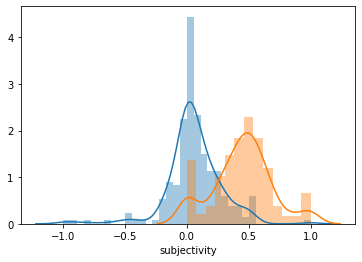

In [39]:
sns.distplot(data_2['polarity'])
sns.distplot(data_2['subjectivity'])

In [41]:
# Agregar columnas al DataFrame con un ciclo While y variar el nombre en cada columna
n=1
while n<5:
    data_2['P'+str(n)]= data_2['content'].apply(lambda x: TextBlob(x).sentiment.polarity)
    data_2['S'+str(n)]= data_2['content'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
    n=n+1
data_2.to_csv('nuevo_ejemplo.csv')                             

In [42]:
# DATAFRAME en Inglés
data_2 = pd.read_csv('files/nuevo_ejemplo.csv')
data_2[:5]

,Unnamed: 0,content,new,polarity,subjectivity,P1,S1,P2,S2,P3,S3,P4,S4
0,0,If the choice is between mining for bitcoin - ...,"Si la elección es entre la minería de bitcoin,...",-0.150000,0.250000,-0.150000,0.250000,-0.150000,0.250000,-0.150000,0.250000,-0.150000,0.250000
1,1,"<br/>To me, Bitcoin (et al) appears to be an e...","<br/> Para mí, Bitcoin (et al) parece ser un j...",-0.107143,0.471429,-0.107143,0.471429,-0.107143,0.471429,-0.107143,0.471429,-0.107143,0.471429
2,2,Bitcoin is a pyramid scheme backed by nothing ...,Bitcoin es un esquema piramidal respaldado por...,0.008566,0.415734,0.008566,0.415734,0.008566,0.415734,0.008566,0.415734,0.008566,0.415734
3,3,What does it cost in energy to dig up and refi...,¿Cuánto cuesta en energía desenterrar y refina...,0.146892,0.598589,0.146892,0.598589,0.146892,0.598589,0.146892,0.598589,0.146892,0.598589
4,4,You forgot to mention stock buybacks.,Olvidó mencionar las recompras de acciones.,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# <span style="color:blue">**Análisis de EMOJIS**</span>
* Los emojis son pequeñas imágenes insertadas en el texto, que expresan una emoción o una idea. La palabra emoji significa “picture-character” (viene del Japonés e — “picture,” and moji — “letter, character”)

In [11]:
# Instalar la librería emot
!pip install emot

In [12]:
# importar las librerías necesarias
import re
from emot.emo_unicode import UNICODE_EMO, EMOTICONS

In [13]:
# Función para convertir un emoji en una palabra
def convert_emojis(text):
    for emot in UNICODE_EMO:
        text = text.replace(emot, "_".join(UNICODE_EMO[emot].replace(",","").replace(":","").split()))
    return text

In [14]:
# Ejemplo
text1 = "Hola buenos días 😂. Hoy será un buen día 😎, Espero no terminar cansada 😒"
convert_emojis(text1)

'Hola buenos días face_with_tears_of_joy. Hoy será un buen día smiling_face_with_sunglasses, Espero no terminar cansada unamused_face'

# <span style="color:blue">**Análisis de EMOTICONES**</span>
* Los emoticones son la representación de una cara humana hecha con signos de puntuación como la coma, guiones, comillas, parentesis, etc.

In [15]:
# Función para convertir un emotico en una palabra
def convert_emoticons(text):
    for emot in EMOTICONS:
        text = re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",","").split()), text)
    return text

In [16]:
# Ejemplo
text = ":-) Hola que tengas un buen día :-)"
convert_emoticons(text)

'Happy_face_smiley Hola que tengas un buen día Happy_face_smiley'

# <span style="color:blue">**TRANSFORMACION DE FECHAS**</span>
* La variable fecha viene en formato timestamp (marca de tiempo Unix): Cantidad de segundos que han transcurrido desde el 01/01/1970

In [1]:
import datetime
import time

In [2]:
fecha= datetime.datetime(2013,12,27)
print(fecha)
print(type(fecha))

2013-12-27 00:00:00
<class 'datetime.datetime'>


In [3]:
marca_de_tiempo=time.mktime(fecha.timetuple())
print('Cantidad de segundos transcurridos desde el 01/01/1970 :',marca_de_tiempo)
print(type(marca_de_tiempo))

Cantidad de segundos transcurridos desde el 01/01/1970 : 1388113200.0
<class 'float'>


In [4]:
from datetime import datetime

timestamp = 1545730073
dt_object = datetime.fromtimestamp(timestamp)

print("dt_object =", dt_object)
print("type(dt_object) =", type(dt_object))

dt_object = 2018-12-25 06:27:53
type(dt_object) = <class 'datetime.datetime'>
